<a href="https://colab.research.google.com/github/prmsnd/BotaniCognizer/blob/main/CNN_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARY
import tensorflow
import keras
import os
import glob
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing and loading the data into a data frame
dataset_path = '/content/drive/MyDrive/Data Preparation Praktik/dataset'
class_names = ['cemara' , 'pinus','tabebuya']

#apply glob module to retrieve files/pathnames

tree_path = os.path.join(dataset_path, class_names[1], '*')
tree_path = glob.glob(tree_path)

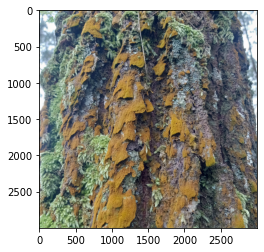

In [ ]:
#accessing an image file from the dataset classes
image = io.imread(tree_path[488])

#plotting the original image
i, (im1)=plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB image channels')

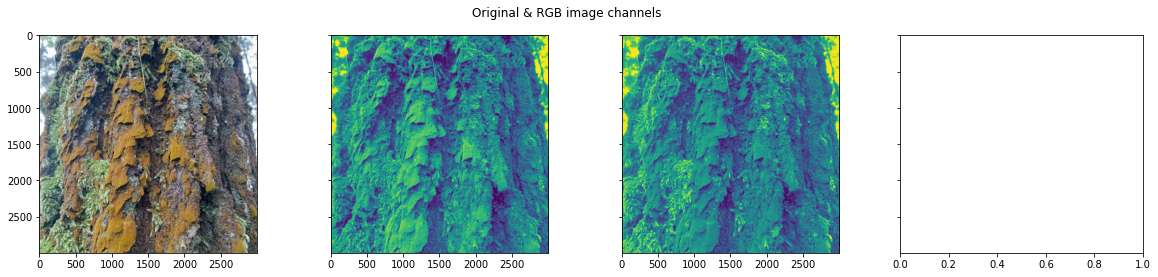

In [ ]:
#plotting the original image and the RGB Channels
i, (im1, im2, im3, im4)=plt.subplots(1,4, sharey=True)
i.set_figwidth(20)

im1.imshow(image) #original
im2.imshow(image[:, :, 0]) #red
im3.imshow(image[:, :, 1]) #green
# im4.imshow(image[:, :, 2]) #blue

i.suptitle('Original & RGB image channels')

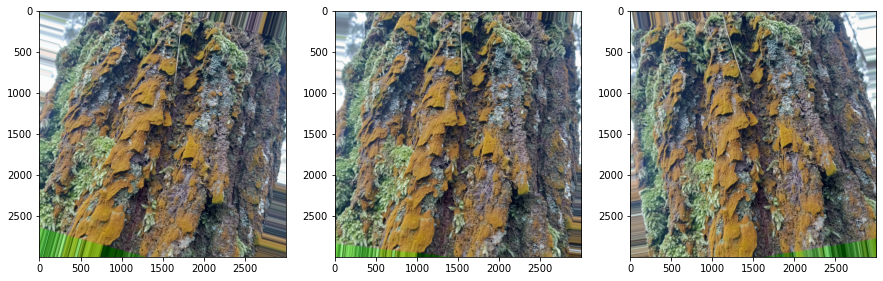

In [ ]:
#import librarlies
# expand dimension
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
#convert to numpy array
data = img_to_array(image)
#expannd dimension to one sample
samples = expand_dims(image, 0)
#creat image data augmentation generator
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')
#crete an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,25))
# generate batch of images
for i in range(3):
  # convert to unsigned intergers
  image = next(it)[0].astype('uint8')
  # plot image
  im[i].imshow(image)

In [ ]:
from matplotlib.cbook import flatten
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_dir = '/content/drive/MyDrive/Data Preparation Praktik/dataset'
batch_size = 32 #pemrosesan di komputernya
img_height = 280
img_width = 280 # pixel nya

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.25,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.25,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1500 files belonging to 3 classes.
Using 1125 files for training.
Found 1500 files belonging to 3 classes.
Using 375 files for validation.


(32, 280, 280, 3)
(32,)
0.0 1.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 280, 280, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 140, 140, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 70, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)      

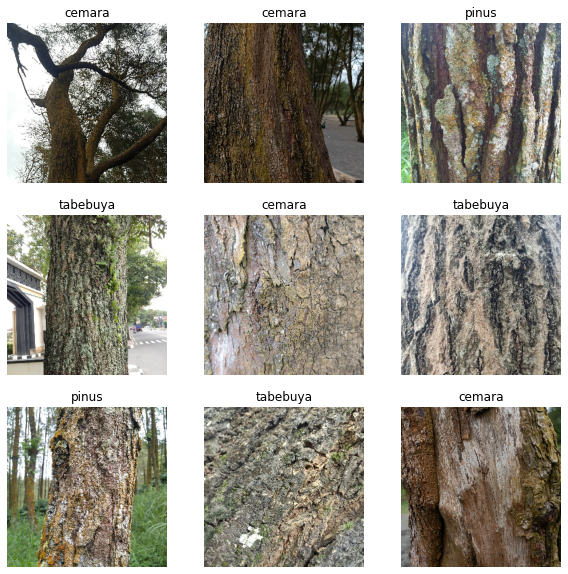

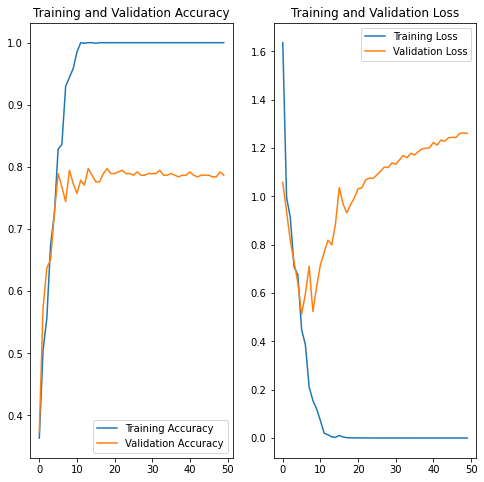

In [ ]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(999).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#notice the pixel values are noe in "[0,1]".
print(np.min(first_image), np.max(first_image))


num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


epochs = 50
history = model.fit(
    train_ds,
    validation_data= val_ds,
    epochs = epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()